# <div style='padding:25px;background-color:maroon;color:white;border-radius:4px;font-size:100%;text-align: center'>Banking Data Analysis<br></div>

# <div style='padding:7px;background-color:Maroon;color:white;border-radius:2px;font-size:100%;text-align: center'>CLassification Modeling<br></div>

## <span style="color:Aqua;">Importing libraries from Python</span>

In [53]:
import pandas as pd
pd.options.display.max_columns = 50
pd.set_option("display.precision", 4)
pd.set_option('display.float_format', '{:.4f}'.format)

import numpy as np

import seaborn as sns
sns.set_theme(context='notebook', style='white', palette='dark', font='sans-serif', font_scale=1, color_codes=True, rc=None)
sns.set_style({'axes.facecolor': 'white','axes.edgecolor': 'white'})

import matplotlib.pyplot as plt
plt.rcParams.update({
    'text.color': 'black',  # Change font color
    'axes.labelcolor': 'black',  # Change axis label color
    'xtick.color': 'black',  # Change x-tick color
    'ytick.color': 'black',  # Change y-tick color
    'font.weight': 'bold',  # Change font weight
    'axes.titleweight': 'bold',  # Change title weight
    'axes.labelweight': 'bold',# Change label weight
})

from imblearn.combine import SMOTETomek

from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score, auc, roc_auc_score, roc_curve, balanced_accuracy_score
import xgboost as xg

import pickle



## <span style="color:Aqua;">Reading model dataset:</span>

In [2]:
df = pd.read_feather('clustered.feather')

In [3]:
df.sample(3)

,num_bank_accounts,num_credit_card,num_of_loan,delay_from_due_date,num_of_delayed_payment,num_credit_inquiries,credit_mix,payment_of_min_amount,payment_behaviour,credit_score,Mortgage Loan,Home Equity Loan,Credit-Builder Loan,Payday Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Auto Loan,credit_inquiry_per_loan,age_group,disposable_income,age_boxcox,annual_income_boxcox,monthly_inhand_salary_boxcox,interest_rate_boxcox,outstanding_debt_square,credit_utilization_ratio_log,credit_history_age_boxcox,changed_credit_limit_cube,total_emi_per_month_square,amount_invested_monthly_boxcox,monthly_balance_boxcox,credit_limit_change_rate_exp,debt_income_ratio_log,loan_income_ratio_month_boxcox,credit_utilization_per_account_boxcox,reliable_payment_boxcox,delayed_payment_ratio_boxcox,investment_to_income_ratio_square,credit_limit_change_rate_boxcox,total_credit_exposure_boxcox,credit_utilization_to_income_ratio_boxcox,savings_rate_rec,income_stability_boxcox,total_liability_boxcox,debt_paytime_log,Cluster
93549,6,10,6,26,24,10.0000,0,2,1,0,1,0,1,0,0,1,1,1,2.0000,0,1552.6579,6.9059,12.5255,10.2647,7.8331,69.5183,3.2958,41.9621,64,8.1134,5.7872,18.7206,0.7900,6.9112,1.7654,0.8439,5.4361,1.4903,0.1267,-1.0494,40.3259,-8.3579,62.2367,0.1388,41.3581,4.2811,0
47711,9,10,9,30,17,12.0000,0,2,5,0,1,1,1,0,1,1,1,0,2.0000,0,3532.9754,6.5881,14.0819,11.9057,8.6239,52.8608,3.6376,35.4245,-121,15.6109,6.9478,20.2866,0.8369,7.6869,1.6338,0.8385,5.1065,0.5751,0.1003,-0.8171,33.7099,-9.3624,99.4020,0.0397,35.2445,2.4353,1
79505,5,3,4,1,0,3.0000,2,0,0,2,1,1,0,0,0,0,0,1,1.0000,3,1612.8393,14.8204,12.8499,10.3095,4.3379,26.3040,3.1781,184.7617,1,6.7044,4.2031,20.5111,0.3111,7.8641,1.8629,0.8567,-1.5196,-0.9242,0.0925,-3.4357,21.0450,-8.8859,116.9259,-0.0444,21.6166,2.7119,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 47 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   num_bank_accounts                          100000 non-null  int8   
 1   num_credit_card                            100000 non-null  int8   
 2   num_of_loan                                100000 non-null  int8   
 3   delay_from_due_date                        100000 non-null  int8   
 4   num_of_delayed_payment                     100000 non-null  int8   
 5   num_credit_inquiries                       100000 non-null  float64
 6   credit_mix                                 100000 non-null  int8   
 7   payment_of_min_amount                      100000 non-null  int8   
 8   payment_behaviour                          100000 non-null  int8   
 9   credit_score                               100000 non-null  int8   
 10  Mortgage 

## <span style="color:Aqua;">Analyzing the Data:</span>

In [4]:
df.sample(2)

,num_bank_accounts,num_credit_card,num_of_loan,delay_from_due_date,num_of_delayed_payment,num_credit_inquiries,credit_mix,payment_of_min_amount,payment_behaviour,credit_score,Mortgage Loan,Home Equity Loan,Credit-Builder Loan,Payday Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Auto Loan,credit_inquiry_per_loan,age_group,disposable_income,age_boxcox,annual_income_boxcox,monthly_inhand_salary_boxcox,interest_rate_boxcox,outstanding_debt_square,credit_utilization_ratio_log,credit_history_age_boxcox,changed_credit_limit_cube,total_emi_per_month_square,amount_invested_monthly_boxcox,monthly_balance_boxcox,credit_limit_change_rate_exp,debt_income_ratio_log,loan_income_ratio_month_boxcox,credit_utilization_per_account_boxcox,reliable_payment_boxcox,delayed_payment_ratio_boxcox,investment_to_income_ratio_square,credit_limit_change_rate_boxcox,total_credit_exposure_boxcox,credit_utilization_to_income_ratio_boxcox,savings_rate_rec,income_stability_boxcox,total_liability_boxcox,debt_paytime_log,Cluster
58777,6,4,1,23,8,3.0000,1,0,4,1,0,0,1,0,0,0,0,0,2.0000,3,5831.6430,12.7638,14.9229,12.8128,4.6482,20.7974,3.3322,132.3814,51,7.3094,8.8743,27.3508,0.5421,9.3803,2.0612,0.8567,1.4029,1.7185,0.1053,-2.2863,17.9847,-10.7748,90.1141,-0.0069,18.6202,2.0728,0
86315,2,5,2,14,0,0.0000,2,1,1,1,1,0,0,0,0,0,1,0,0.0000,3,6941.8788,13.1913,15.2215,13.1875,0.8291,37.2853,3.2189,152.0819,27,9.6556,10.5134,22.6923,0.4051,9.2636,2.0041,1.0527,-1.5196,-0.9242,0.1174,-2.9685,26.6600,-11.3015,72.4919,0.0006,27.6073,2.6914,0


In [12]:
credit_mix_cross=pd.crosstab(df['credit_score'],df['credit_mix'],margins=False)
credit_mix_cross

credit_mix,0,1,2
credit_score,,,
0,14289,9858,4851
1,9128,33361,10685
2,351,2629,14848


In [11]:
num_of_loan_cross=pd.crosstab(df['credit_score'],df['payment_behaviour'],margins=False)
num_of_loan_cross

payment_behaviour,0,1,2,3,4,5
credit_score,,,,,,
0,10175,4344,3027,3215,5073,3164
1,14736,7457,5791,6362,10711,8117
2,3705,2598,1939,2187,3954,3445


In [19]:
features = list(df.columns)
print(features,'\n',len(features))

['num_bank_accounts', 'num_credit_card', 'num_of_loan', 'delay_from_due_date', 'num_of_delayed_payment', 'num_credit_inquiries', 'credit_mix', 'payment_of_min_amount', 'payment_behaviour', 'credit_score', 'Mortgage Loan', 'Home Equity Loan', 'Credit-Builder Loan', 'Payday Loan', 'Personal Loan', 'Debt Consolidation Loan', 'Student Loan', 'Auto Loan', 'credit_inquiry_per_loan', 'age_group', 'disposable_income', 'age_boxcox', 'annual_income_boxcox', 'monthly_inhand_salary_boxcox', 'interest_rate_boxcox', 'outstanding_debt_square', 'credit_utilization_ratio_log', 'credit_history_age_boxcox', 'changed_credit_limit_cube', 'total_emi_per_month_square', 'amount_invested_monthly_boxcox', 'monthly_balance_boxcox', 'credit_limit_change_rate_exp', 'debt_income_ratio_log', 'loan_income_ratio_month_boxcox', 'credit_utilization_per_account_boxcox', 'reliable_payment_boxcox', 'delayed_payment_ratio_boxcox', 'investment_to_income_ratio_square', 'credit_limit_change_rate_boxcox', 'total_credit_exposure

## <span style="color:Aqua;">Preparing the data afor modeling:</span>

In [20]:
x = df.drop('credit_score',axis=1)
y = df[['credit_score']]

In [22]:
x.describe()

,num_bank_accounts,num_credit_card,num_of_loan,delay_from_due_date,num_of_delayed_payment,num_credit_inquiries,credit_mix,payment_of_min_amount,payment_behaviour,Mortgage Loan,Home Equity Loan,Credit-Builder Loan,Payday Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Auto Loan,credit_inquiry_per_loan,age_group,disposable_income,age_boxcox,annual_income_boxcox,monthly_inhand_salary_boxcox,interest_rate_boxcox,outstanding_debt_square,credit_utilization_ratio_log,credit_history_age_boxcox,changed_credit_limit_cube,total_emi_per_month_square,amount_invested_monthly_boxcox,monthly_balance_boxcox,credit_limit_change_rate_exp,debt_income_ratio_log,loan_income_ratio_month_boxcox,credit_utilization_per_account_boxcox,reliable_payment_boxcox,delayed_payment_ratio_boxcox,investment_to_income_ratio_square,credit_limit_change_rate_boxcox,total_credit_exposure_boxcox,credit_utilization_to_income_ratio_boxcox,savings_rate_rec,income_stability_boxcox,total_liability_boxcox,debt_paytime_log,Cluster
count,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000
mean,5.3688,5.5336,3.5329,21.0814,13.3131,5.7983,1.0662,1.1666,2.2379,0.3136,0.3140,0.3173,0.3194,0.3110,0.3104,0.3104,0.3056,1.8403,2.1350,4089.5716,11.3209,13.8608,11.5778,5.2516,34.6016,3.4457,124.3568,5.5901,8.7194,7.6677,21.1963,0.5315,8.3038,1.9034,0.9265,2.2679,1.3640,0.1207,-2.3385,24.8256,-9.4823,76.0148,-0.0019,25.9091,2.9474,0.2151
std,2.5933,2.0671,2.4464,14.8046,6.2372,3.8678,0.7329,0.9231,1.8613,0.4640,0.4641,0.4654,0.4663,0.4629,0.4627,0.4627,0.4607,1.2931,1.0752,3132.9336,2.5192,1.3315,1.5769,2.4293,15.1312,0.1644,50.7896,57.1509,5.2116,2.4281,4.1683,0.1295,0.9835,0.2104,0.1398,1.5732,1.0182,0.0306,0.6454,7.5147,1.3524,34.1407,0.0780,7.5197,1.7311,0.4109
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-863.3358,6.2613,11.1147,7.3497,0.0000,0.4796,2.9957,0.0000,-121.0000,0.0000,1.1662,11.4435,0.2219,5.9041,1.3983,0.5390,-1.5196,-0.9242,0.0422,-3.8818,5.1299,-13.0149,0.0000,-0.1647,5.7747,-1.0786,0.0000
25%,3.0000,4.0000,2.0000,10.0000,9.0000,3.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1579.0700,9.2002,12.7298,10.2740,3.2999,23.7923,3.3322,86.2900,-39.0000,5.4101,5.9981,18.6373,0.4525,7.6063,1.7683,0.8287,1.3281,0.7704,0.0997,-2.7325,19.7526,-10.5776,50.8176,-0.0425,20.8762,1.8817,0.0000
50%,5.0000,5.0000,3.0000,18.0000,14.0000,5.0000,1.0000,2.0000,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,2.0000,3016.5687,11.4226,13.8046,11.5101,5.2293,34.1490,3.4657,124.8856,0.0000,8.1524,7.5257,20.4546,0.5212,8.3015,1.8874,0.9207,2.1474,1.3010,0.1155,-2.3903,25.1749,-9.4678,73.2512,-0.0016,26.0852,2.8589,0.0000
75%,7.0000,7.0000,5.0000,28.0000,18.0000,8.0000,2.0000,2.0000,4.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.0000,3.0000,5785.1548,13.4018,14.9368,12.8384,6.9734,44.1131,3.5835,165.6512,51.0000,12.1405,9.2194,23.4331,0.6063,9.0341,2.0151,1.0218,3.2265,1.9001,0.1381,-1.9663,29.8719,-8.3755,96.9042,0.0390,30.9438,3.8552,0.0000
max,11.0000,11.0000,9.0000,62.0000,25.0000,17.0000,2.0000,2.0000,5.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,12.0000,4.0000,15101.9400,16.1564,16.5758,14.8721,9.7112,70.6970,3.9120,213.8333,125.0000,22.2362,14.0514,30.6269,0.8369,11.1759,2.3598,1.2477,6.0742,3.5947,0.1957,-0.8171,40.8020,-6.3219,154.0589,0.1612,44.6478,6.8156,1.0000


In [23]:
y.describe()

,credit_score
count,100000.0000
mean,0.8883
std,0.6751
min,0.0000
25%,0.0000
50%,1.0000
75%,1.0000
max,2.0000


In [24]:
y.value_counts()

credit_score
1               53174
0               28998
2               17828
Name: count, dtype: int64

## <span style="color:Aqua;">Splitting data for train_test and resampling imbalanced data classess:</span>

In [25]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=.3,random_state=42)

smote_tomek = SMOTETomek(random_state=42)
x_train, y_train = smote_tomek.fit_resample(x_train, y_train) 

In [26]:
print(x_train.shape,'----', y_train.shape)
print(x_test.shape,'----', y_test.shape)

(107145, 46) ---- (107145, 1)
(30000, 46) ---- (30000, 1)


## <span style="color:Aqua;">Normalizing / Scaling the data:</span>

In [29]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [47]:
y_train, y_test = y_train.values.ravel(), y_test.values.ravel()

## <span style="color:Aqua;">Training all the model:</span>

#### <span style="color:Khaki;">Defing the function to train and evaluate the model:</span>

In [48]:
def evaluate_model(model, x_train, y_train, x_test, y_test, color_positive='\033[92m', reset_color='\033[0m'):
    model.fit(x_train, y_train)
    y_preds = model.predict(x_test)
    y_preds_train = model.predict(x_train)

    print(f'{color_positive}Accuracy Test {reset_color} - {accuracy_score(y_test, y_preds)}')
    print(f'{color_positive}Accuracy Train{reset_color} - {accuracy_score(y_train, y_preds_train)}\n')

    print(f'{color_positive}Precision Test {reset_color} - {precision_score(y_test, y_preds, average="weighted")}')
    print(f'{color_positive}Precision Train{reset_color} - {precision_score(y_train, y_preds_train, average="weighted")}\n')

    print(f'{color_positive}Recall Test {reset_color} - {recall_score(y_test, y_preds, average="weighted")}')
    print(f'{color_positive}Recall Train{reset_color} - {recall_score(y_train, y_preds_train, average="weighted")}\n')

    print(f'{color_positive}F1_score Test {reset_color} - {f1_score(y_test, y_preds, average="weighted")}')
    print(f'{color_positive}F1_score Train{reset_color} - {f1_score(y_train, y_preds_train, average="weighted")}\n')
    
    print(f"{color_positive}Confusion Matrix Test {reset_color} -- \n{confusion_matrix(y_test, y_preds)}")
    print(f'{color_positive}Confusion Matrix Train{reset_color} -- \n{confusion_matrix(y_train, y_preds_train)}\n')

    print(f'{color_positive}Classification Report Test{reset_color}\n{classification_report(y_test, y_preds)}')
    print(f'{color_positive}Classification Report Train{reset_color}\n{classification_report(y_train, y_preds_train)}')
    

    print(f'{color_positive}Balanced Accuracy Test {reset_color} - {balanced_accuracy_score(y_test, y_preds)}')
    print(f'{color_positive}Balanced Accuracy Train{reset_color} - {balanced_accuracy_score(y_train, y_preds_train)}\n')

    cm = confusion_matrix(y_test, y_preds)
    specificity = np.diag(cm) / np.sum(cm, axis=1)
    print(f'{color_positive}Specificity Test{reset_color} - {specificity.mean()}\n')

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1], pos_label=1)
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
        plt.figure()
        plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title(f'ROC Curve for {type(model).__name__}')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print(f'{color_positive}ROC Curve not available for {type(model).__name__}{reset_color}')
    print('-'*40)

Accuracy Test  - 0.7316
Accuracy Train - 1.0

Precision Test  - 0.7332529190334585
Precision Train - 1.0

Recall Test  - 0.7316
Recall Train - 1.0

F1_score Test  - 0.7321582753849377
F1_score Train - 1.0

Confusion Matrix Test  -- 
[[ 6518  2062   225]
 [ 2348 11779  1746]
 [  205  1466  3651]]
Confusion Matrix Train -- 
[[35717     0     0]
 [    0 34923     0]
 [    0     0 36505]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      8805
           1       0.77      0.74      0.76     15873
           2       0.65      0.69      0.67      5322

    accuracy                           0.73     30000
   macro avg       0.71      0.72      0.72     30000
weighted avg       0.73      0.73      0.73     30000

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35717
           1       1.00      1.00      1.00     34923
           2

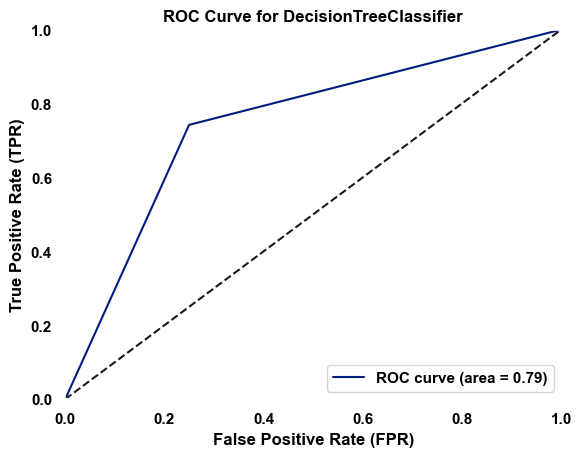

----------------------------------------


In [49]:
DT_Classifier = DecisionTreeClassifier(random_state=42)
evaluate_model(DT_Classifier, x_train, y_train, x_test, y_test)

In [54]:
plt.figure(figsize=(20,10))  # Adjust the figure size as needed
plot_tree(DT_Classifier, filled=True, feature_names=x.columns, class_names=['Class 0', 'Class 1','Class 2'])  
plt.show()

Accuracy Test  - 0.8119
Accuracy Train - 0.9999813337066592

Precision Test  - 0.8161084060097269
Precision Train - 0.9999813339679602

Recall Test  - 0.8119
Recall Train - 0.9999813337066592

F1_score Test  - 0.8122441442157226
F1_score Train - 0.9999813337080676

Confusion Matrix Test  -- 
[[ 7589  1115   101]
 [ 2013 12423  1437]
 [   38   939  4345]]
Confusion Matrix Train -- 
[[35717     0     0]
 [    1 34922     0]
 [    0     1 36504]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      8805
           1       0.86      0.78      0.82     15873
           2       0.74      0.82      0.78      5322

    accuracy                           0.81     30000
   macro avg       0.79      0.82      0.81     30000
weighted avg       0.82      0.81      0.81     30000

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35717
      

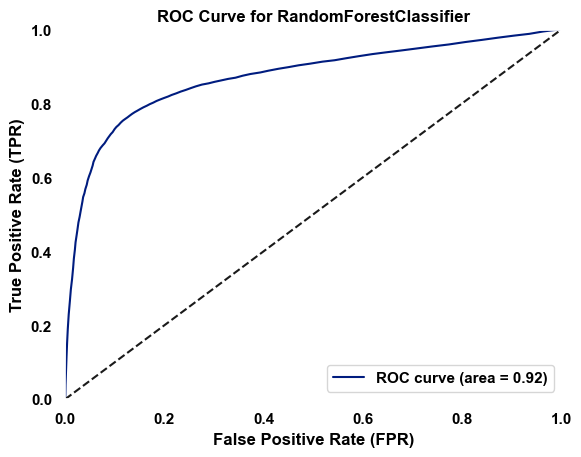

----------------------------------------


In [50]:
RF_Classifier = RandomForestClassifier(random_state=42)
evaluate_model(RF_Classifier, x_train, y_train, x_test, y_test)

Accuracy Test  - 0.7692
Accuracy Train - 0.8970740585188296

Precision Test  - 0.7739529465129746
Precision Train - 0.8969034252685651

Recall Test  - 0.7692
Recall Train - 0.8970740585188296

F1_score Test  - 0.7701564427856362
F1_score Train - 0.8963851999329442

Confusion Matrix Test  -- 
[[ 6926  1594   285]
 [ 2135 11990  1748]
 [   50  1112  4160]]
Confusion Matrix Train -- 
[[32318  2114  1285]
 [ 3230 29030  2663]
 [  274  1462 34769]]

Classification Report Test
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      8805
           1       0.82      0.76      0.78     15873
           2       0.67      0.78      0.72      5322

    accuracy                           0.77     30000
   macro avg       0.75      0.77      0.76     30000
weighted avg       0.77      0.77      0.77     30000

Classification Report Train
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     35717
      

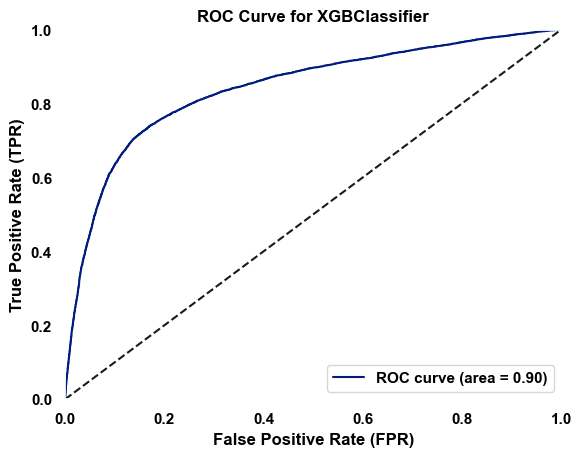

----------------------------------------


In [51]:
xgb_Classifier = xg.XGBClassifier(random_state=42)
evaluate_model(xgb_Classifier, x_train, y_train, x_test, y_test)

In [ ]:
from sklearn.tree import plot_tree

DT_Classifier =DecisionTreeClassifier(max_depth=11,min_samples_leaf=1,min_samples_split=4,random_state=42,)
#criterion='entropy', splitter='best',max_features='sqrt'
DT_Classifier.fit(x_train,y_train)
y_preds=DT_Classifier.predict(x_test)
y_preds_train = DT_Classifier.predict(x_train)

print(f"{color_positive}Confusion Matrix Test {reset_color} -- {confusion_matrix(y_test,y_preds)}")
print(f'{color_positive}Confusion Matrix Train{reset_color} - {confusion_matrix(y_train,y_preds_train)}\n')

print(f'{color_positive}Accuracy Test {reset_color} - {accuracy_score(y_test,y_preds)}')
print(f'{color_positive}Accuracy Train{reset_color} - {accuracy_score(y_train,y_preds_train)}\n')

print(f'{color_positive}Precision Test {reset_color} - {precision_score(y_test,y_preds)}')
print(f'{color_positive}Precision Train{reset_color} - {precision_score(y_train,y_preds_train)}\n')

print(f'{color_positive}Recall Test- {reset_color} {recall_score(y_test,y_preds)}')
print(f'{color_positive}Recall Train{reset_color} - {recall_score(y_train,y_preds_train)}\n')

print(f'{color_positive}F1_score Test- {reset_color} {f1_score(y_test,y_preds)}')
print(f'{color_positive}F1_score Train{reset_color} - {f1_score(y_train,y_preds_train)}\n')

print(f'{color_positive}Classification Report Test{reset_color}\n{classification_report(y_test, y_preds)}')
print(f'{color_positive}Classification Report Train{reset_color}\n{classification_report(y_train, y_preds_train)}')

print(f'{color_positive}Balanced Accuracy Test {reset_color} - {balanced_accuracy_score(y_test, y_preds)}')
print(f'{color_positive}Balanced Accuracy Train{reset_color} - {balanced_accuracy_score(y_train, y_preds_train)}\n')

tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()
specificity = tn / (tn + fp)
print(f'{color_positive}Specificity Test{reset_color} - {specificity}\n')

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
auc = roc_auc_score(y_test, y_preds)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression' )
plt.legend(loc="lower right")
plt.show()
print('-'*40)

NameError: name 'plot_tree' is not defined

<Figure size 2000x1000 with 0 Axes>

In [ ]:
bb

In [ ]:
ET_Classifier =ExtraTreesClassifier(max_depth=20,min_samples_leaf=1,min_samples_split=2,random_state=42,)
ET_Classifier.fit(x_train,y_train)
y_preds=ET_Classifier.predict(x_test)
y_preds_train = ET_Classifier.predict(x_train)

print(f"{color_positive}Confusion Matrix Test {reset_color} -- {confusion_matrix(y_test,y_preds)}")
print(f'{color_positive}Confusion Matrix Train{reset_color} - {confusion_matrix(y_train,y_preds_train)}\n')

print(f'{color_positive}Accuracy Test {reset_color} - {accuracy_score(y_test,y_preds)}')
print(f'{color_positive}Accuracy Train{reset_color} - {accuracy_score(y_train,y_preds_train)}\n')

print(f'{color_positive}Precision Test {reset_color} - {precision_score(y_test,y_preds)}')
print(f'{color_positive}Precision Train{reset_color} - {precision_score(y_train,y_preds_train)}\n')

print(f'{color_positive}Recall Test- {reset_color} {recall_score(y_test,y_preds)}')
print(f'{color_positive}Recall Train{reset_color} - {recall_score(y_train,y_preds_train)}\n')

print(f'{color_positive}F1_score Test- {reset_color} {f1_score(y_test,y_preds)}')
print(f'{color_positive}F1_score Train{reset_color} - {f1_score(y_train,y_preds_train)}\n')

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
auc = roc_auc_score(y_test, y_preds)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression' )
plt.legend(loc="lower right")
plt.show()
print('-'*40)

In [ ]:
RF_Classifier =RandomForestClassifier(max_depth=15,min_samples_leaf=1,min_samples_split=2,)
RF_Classifier.fit(x_train,y_train)
y_preds=RF_Classifier.predict(x_test)
y_preds_train = RF_Classifier.predict(x_train)

print(f"{color_positive}Confusion Matrix Test {reset_color} -- {confusion_matrix(y_test,y_preds)}")
print(f'{color_positive}Confusion Matrix Train{reset_color} - {confusion_matrix(y_train,y_preds_train)}\n')

print(f'{color_positive}Accuracy Test {reset_color} - {accuracy_score(y_test,y_preds)}')
print(f'{color_positive}Accuracy Train{reset_color} - {accuracy_score(y_train,y_preds_train)}\n')

print(f'{color_positive}Precision Test {reset_color} - {precision_score(y_test,y_preds)}')
print(f'{color_positive}Precision Train{reset_color} - {precision_score(y_train,y_preds_train)}\n')

print(f'{color_positive}Recall Test- {reset_color} {recall_score(y_test,y_preds)}')
print(f'{color_positive}Recall Train{reset_color} - {recall_score(y_train,y_preds_train)}\n')

print(f'{color_positive}F1_score Test- {reset_color} {f1_score(y_test,y_preds)}')
print(f'{color_positive}F1_score Train{reset_color} - {f1_score(y_train,y_preds_train)}\n')

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
auc = roc_auc_score(y_test, y_preds)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest' )
plt.legend(loc="lower right")
plt.show()
print('-'*40)

In [ ]:
xgb_Classifier =XGBClassifier(learning_rate=1.25,n_estimators=365,min_child_weight=1.5,max_depth=7)
# max_depth=10,learning_rate=0.239,min_child_weight=1,n_estimators=365
xgb_Classifier.fit(x_train,y_train)
y_preds=xgb_Classifier.predict(x_test)
y_preds_train = xgb_Classifier.predict(x_train)

print(f"{color_positive}Confusion Matrix Test {reset_color} -- {confusion_matrix(y_test,y_preds)}")
print(f'{color_positive}Confusion Matrix Train{reset_color} - {confusion_matrix(y_train,y_preds_train)}\n')

print(f'{color_positive}Accuracy Test {reset_color} - {accuracy_score(y_test,y_preds)}')
print(f'{color_positive}Accuracy Train{reset_color} - {accuracy_score(y_train,y_preds_train)}\n')

print(f'{color_positive}Precision Test {reset_color} - {precision_score(y_test,y_preds)}')
print(f'{color_positive}Precision Train{reset_color} - {precision_score(y_train,y_preds_train)}\n')

print(f'{color_positive}Recall Test- {reset_color} {recall_score(y_test,y_preds)}')
print(f'{color_positive}Recall Train{reset_color} - {recall_score(y_train,y_preds_train)}\n')

print(f'{color_positive}F1_score Test- {reset_color} {f1_score(y_test,y_preds)}')
print(f'{color_positive}F1_score Train{reset_color} - {f1_score(y_train,y_preds_train)}\n')

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
auc = roc_auc_score(y_test, y_preds)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest' )
plt.legend(loc="lower right")
plt.show()
print('-'*40)

In [ ]:
from xgboost import plot_importance

# feature_names = x_train.columns
# importances = xgb_Classifier.feature_importances_


# feature_importances_df = pd.DataFrame({
#     'Feature': feature_names,
#     'Importance': importances
# })
# feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(20, 8)) 

ax1 = axes[0]
ax2 = axes[1]

plot_importance(xgb_Classifier, max_num_features=10,ax=ax1)
plt.title('XGBoost Feature Importance')


sns.barplot(x='Importance', y='Feature', data=feature_importances_df,ax=ax2)
plt.title('Feature Importances')
plt.tight_layout()

plt.show()

In [ ]:
kf=KFold(n_splits=10,shuffle=True,random_state=42)
RF_cv_score = cross_val_score(RF_Classifier,x_train,y_train, cv=kf)
print(f'Cross validations scores \n\n {RF_cv_score}')
print(f'Cross validations scores mean \n\n {np.mean(RF_cv_score)}')